In [1]:
pip install pandas numpy matplotlib seaborn yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download stock data (NVIDIA)
data = yf.download("NVDA", start="2020-01-01", end="2024-12-31")
data.head()
# This gives you: Open, High, Low, Close, Adj Close, Volume columns

C:\Users\Laksh\AppData\Local\Temp\ipykernel_14920\89091596.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("NVDA", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971410,5.971410,5.892011,5.942538,237536000
2020-01-03,5.875832,5.919639,5.826798,5.851688,205384000
2020-01-06,5.900472,5.905699,5.756358,5.782493,262636000
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000
2020-01-08,5.983108,6.024426,5.927603,5.967676,277108000


In [4]:
# data describe
print(data.describe())
print(data.info())

Price         Close         High          Low         Open        Volume
Ticker         NVDA         NVDA         NVDA         NVDA          NVDA
count   1257.000000  1257.000000  1257.000000  1257.000000  1.257000e+03
mean      38.361343    39.069100    37.586979    38.362776  4.470044e+08
std       38.144986    38.851310    37.397751    38.198954  1.875881e+08
min        4.891361     5.228575     4.499852     4.983509  9.788400e+07
25%       13.569347    13.821394    13.331018    13.598517  3.088640e+08
50%       21.221697    21.724464    20.791347    21.163795  4.205910e+08
75%       45.554153    46.190774    44.892842    45.692072  5.470070e+08
max      148.837341   152.846179   146.218059   149.307200  1.543911e+09
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1257 non-null   float64
 1   (High,

In [5]:
# Data Cleaning
# Check missing values
print(data.isnull().sum())

#check for duplicates 
print(data.duplicated().sum())

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64
0


In [6]:
# resetting index for easy plotting
data.reset_index(inplace=True)

data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2020-01-02,5.971410,5.971410,5.892011,5.942538,237536000
1,2020-01-03,5.875832,5.919639,5.826798,5.851688,205384000
2,2020-01-06,5.900472,5.905699,5.756358,5.782493,262636000
3,2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000
4,2020-01-08,5.983108,6.024426,5.927603,5.967676,277108000


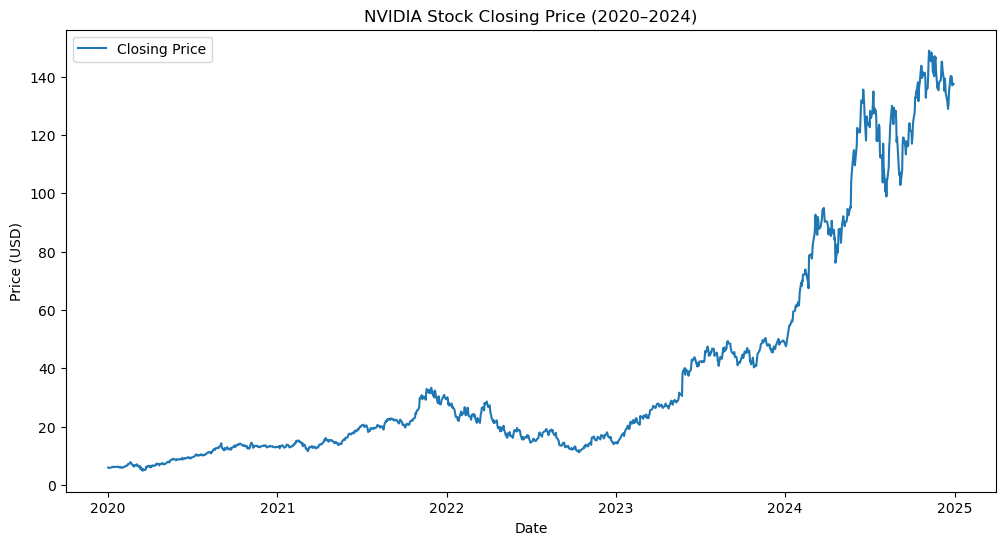

In [7]:
# plotting closing price trend
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('NVIDIA Stock Closing Price (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

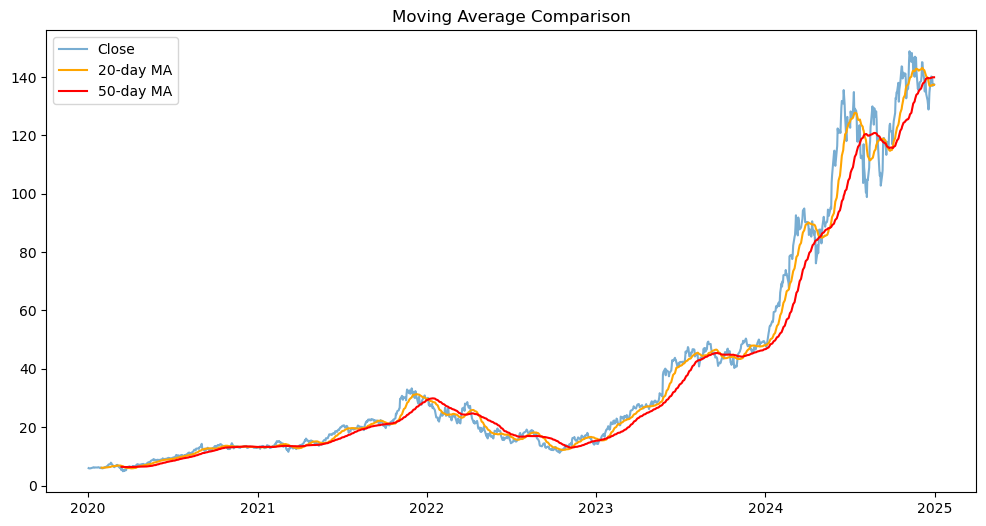

In [8]:
# Calculate 20-day and 50-day moving averages to show short-term and medium-term closing price trends

data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close', alpha=0.6)
plt.plot(data['Date'], data['MA20'], label='20-day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-day MA', color='red')
plt.title('Moving Average Comparison')
plt.legend()
plt.show()

Average Daily Return: 0.31 %
Volatility (Std Dev): 3.39 %


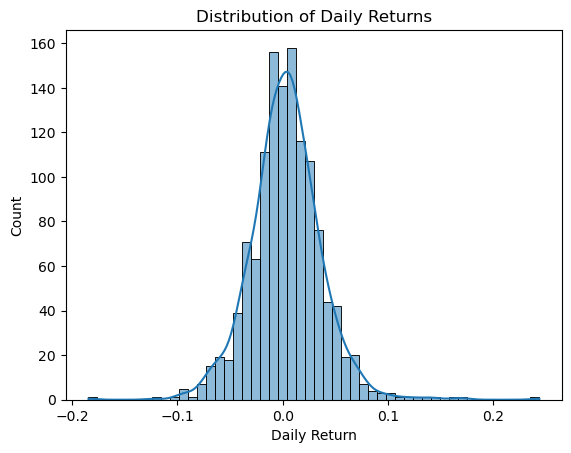

In [9]:
# calculate daily returns and stock voltality 
data['Daily Return'] = data['Close'].pct_change()
print("Average Daily Return:", round(data['Daily Return'].mean()*100, 2), "%")
print("Volatility (Std Dev):", round(data['Daily Return'].std()*100, 2), "%")

# plot returns distribution
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

In [10]:
# saving data to csv file
data.to_csv("NVDA_stock_cleaned.csv", index=False)